In [1]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [2]:
!gdown 1KMcERHrUuzCtbNQlFQn1jDcoQDNHRSQP

Downloading...
From: https://drive.google.com/uc?id=1KMcERHrUuzCtbNQlFQn1jDcoQDNHRSQP
To: C:\Users\tejas\Downloads\codes_tejas_final\loan_prediction\LoanApprovalPrediction.csv

  0%|          | 0.00/37.1k [00:00<?, ?B/s]
100%|##########| 37.1k/37.1k [00:00<00:00, 2.64MB/s]


In [3]:
## Install the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline




In [4]:
df = pd.read_csv('LoanApprovalPrediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
597,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.shape

(598, 13)

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [10]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [11]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

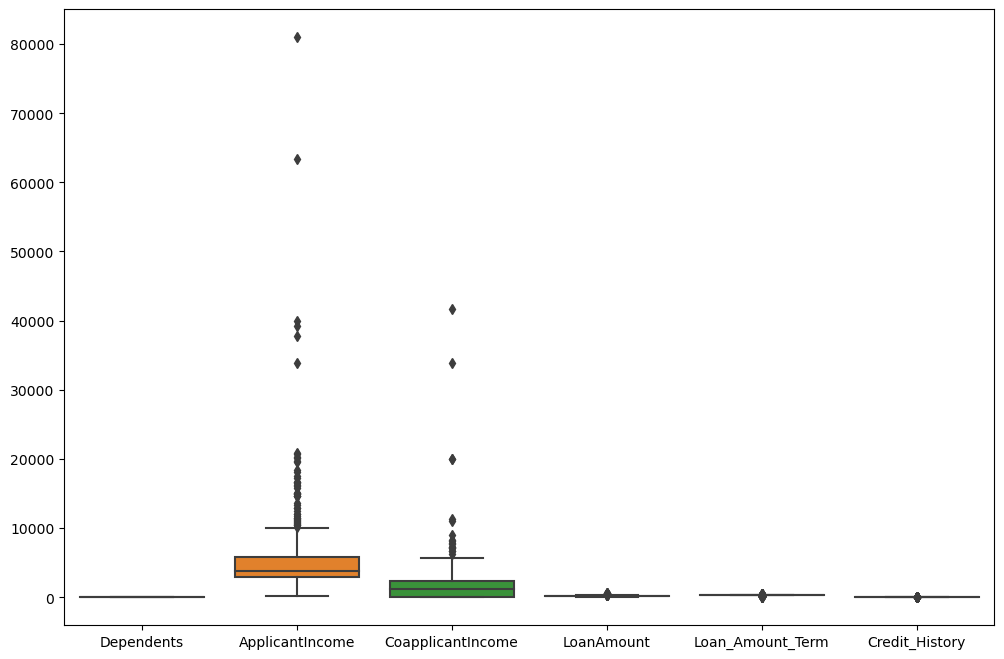

In [12]:
## Checking the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [13]:
## Fill the null values of numerical datatype
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())



In [14]:
## Fill the null values of object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [15]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by gender
Gender
Male      487
Female    111
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

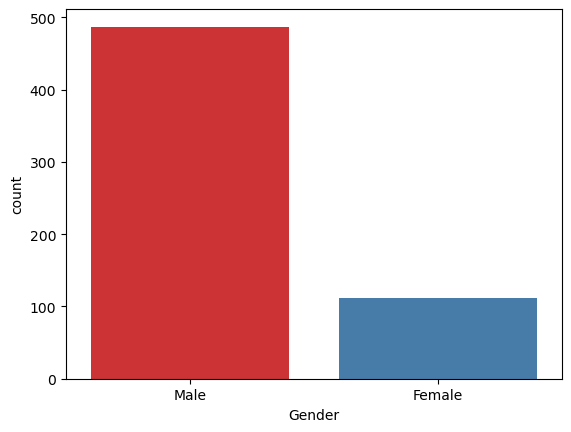

In [17]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df, palette='Set1')

Number of people who took loan by Married
Married
Yes    388
No     210
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

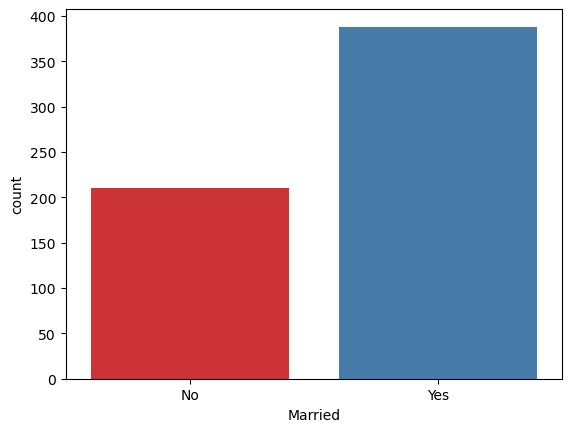

In [18]:
print('Number of people who took loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df, palette='Set1')

Number of people who took loan by Education
Education
Graduate        465
Not Graduate    133
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

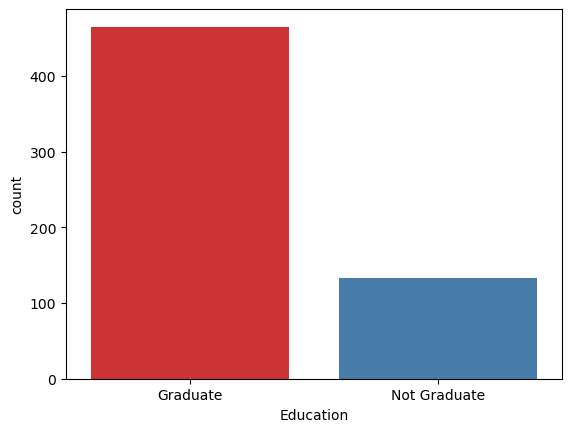

In [19]:
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df, palette='Set1')

In [20]:
## Total Applicant Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

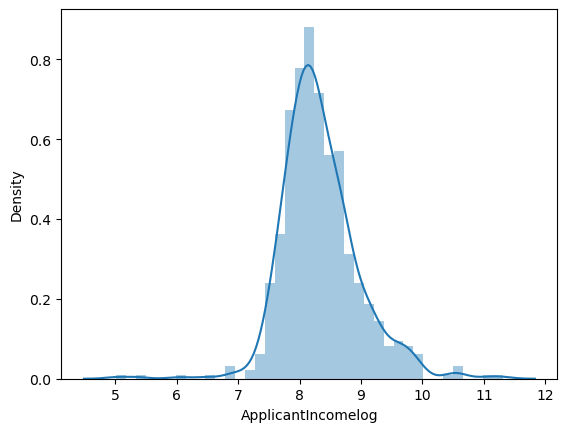

In [21]:
## Apply Log Transformation

df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomelog'])

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

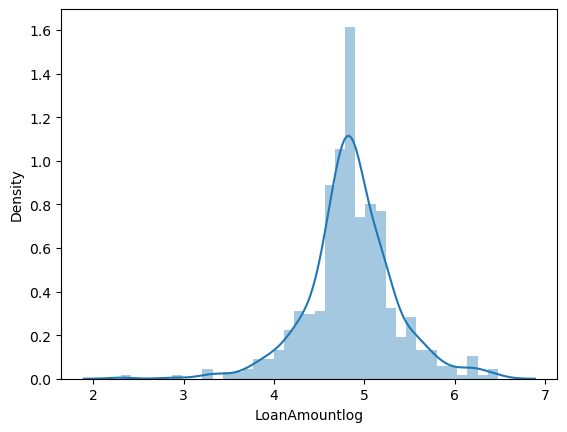

In [23]:
df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

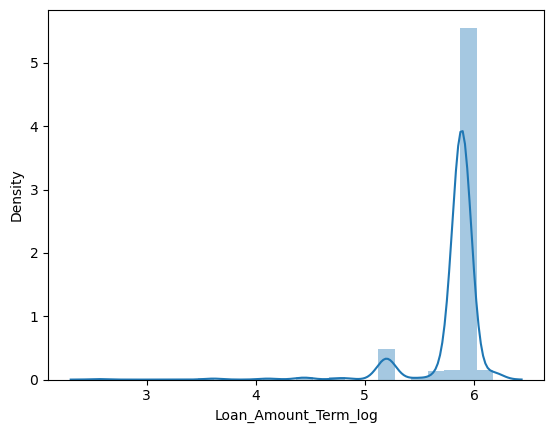

In [24]:

df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_log'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

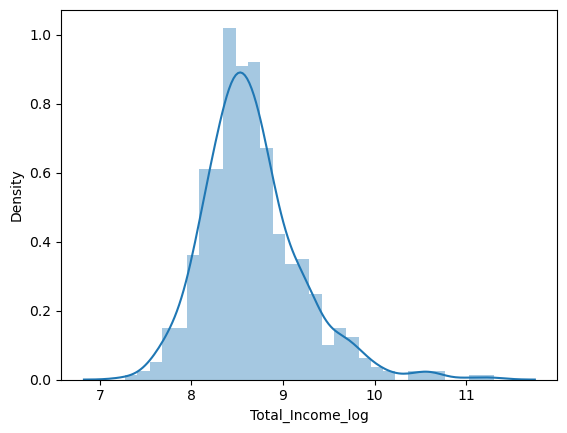

In [25]:

df['Total_Income_log'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_Income_log'])

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.852030,5.888878,8.674197
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [27]:
## drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0.0,Graduate,No,1.0,Urban,Y,8.674197,4.852030,5.888878,8.674197
1,Male,Yes,1.0,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0.0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0.0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0.0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [28]:
## Encoding Technique : Label Encoding, One Hot Encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le =  LabelEncoder()
for col in cols:
  df[col] =  le.fit_transform(df[col])

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.852030,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [30]:
df.dtypes

Gender                    int32
Married                   int32
Dependents                int64
Education                 int32
Self_Employed             int32
Credit_History          float64
Property_Area             int32
Loan_Status               int32
ApplicantIncomelog      float64
LoanAmountlog           float64
Loan_Amount_Term_log    float64
Total_Income_log        float64
dtype: object

In [31]:
## Split Independent and dependent features

X = df.drop(columns = ['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [32]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.852030,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
594,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
595,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
596,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [33]:
y

0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 598, dtype: int32

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)


In [36]:
## Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_model = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  77.77777777777779


In [37]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model,y_test,y_pred_model)


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.74      0.45      0.56        56
           1       0.79      0.93      0.85       124

    accuracy                           0.78       180
   macro avg       0.76      0.69      0.70       180
weighted avg       0.77      0.78      0.76       180




In [38]:
df['Loan_Status'].value_counts()

Loan_Status
1    411
0    187
Name: count, dtype: int64

In [39]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   --------- ----------------------------- 61.4/258.0 kB 812.7 kB/s eta 0:00:01
   ------------------------- -------------- 163.8/258.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(y_resampled,name="Loan_status")],axis=1)

In [42]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.852030,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
817,1,0,0,0,0,1.0,0,9.915120,6.175867,5.888878,9.915120
818,1,1,2,1,0,0.0,0,7.745003,4.836282,5.888878,8.178919
819,1,1,3,1,0,0.0,2,7.988882,4.262680,5.198497,8.436417
820,0,0,0,0,0,0.0,2,7.783641,4.653960,5.888878,8.357963


In [43]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
817    0
818    0
819    0
820    0
821    0
Name: Loan_Status, Length: 822, dtype: int32

In [44]:
y_resampled.value_counts()

Loan_Status
1    411
0    411
Name: count, dtype: int64

In [45]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,test_size = 0.3,random_state=42)

In [46]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  86.23481781376519


In [47]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")


generate_classification_report(model3,y_resampled_test,y_pred_model3)


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       123
           1       0.86      0.86      0.86       124

    accuracy                           0.86       247
   macro avg       0.86      0.86      0.86       247
weighted avg       0.86      0.86      0.86       247




In [48]:
from sklearn.svm import SVC

# Configure the SVM classifier
model_svm = SVC(kernel='linear')

# Fit the SVM model on the training data
model_svm.fit(X_train, y_train)

# Predict using the trained SVM model
y_pred_svm = model_svm.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy score of SVM: ", svm_accuracy * 100)

# Generate and print the classification report
generate_classification_report(model_svm, y_test, y_pred_svm)


Accuracy score of SVM:  79.44444444444444
Classification Report For SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.88      0.39      0.54        56
           1       0.78      0.98      0.87       124

    accuracy                           0.79       180
   macro avg       0.83      0.68      0.71       180
weighted avg       0.81      0.79      0.77       180




SECOND IMPLEMENTATION

XGBoost As Random Forest Classifier

In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# Load data and preprocessing steps remain the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up XGBoost in a Random Forest-like mode
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, subsample=0.8, colsample_bytree=0.8)

# Optional: Perform grid search to find the best hyperparameters
params = {
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

# Evaluate the model
y_pred_xgb = best_xgb.predict(X_test)
print("Accuracy of XGBoost configured like Random Forest: ", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Accuracy of XGBoost configured like Random Forest:  0.7944444444444444
              precision    recall  f1-score   support

           0       0.77      0.48      0.59        56
           1       0.80      0.94      0.86       124

    accuracy                           0.79       180
   macro avg       0.79      0.71      0.73       180
weighted avg       0.79      0.79      0.78       180



Advanced SVM with

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM pipeline setup with scaling and classifier
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# Parameters grid to explore
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Different kernels
    'svm__gamma': ['scale', 'auto'],  # Kernel coefficient
    'svm__degree': [2, 3, 4]  # Degree of the polynomial kernel, if polynomial is chosen
}

# Grid search to find the best parameters
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Fetch the best model
best_svm_model = grid_search.best_estimator_

# Predictions and evaluations
y_pred = best_svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
svm_classification_report = classification_report(y_test, y_pred)

print("Best SVM Model Parameters:", grid_search.best_params_)
print("Accuracy of the best SVM model:", svm_accuracy)
print("Classification report of the best SVM model:\n", svm_classification_report)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best SVM Model Parameters: {'svm__C': 0.1, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Accuracy of the best SVM model: 0.7944444444444444
Classification report of the best SVM model:
               precision    recall  f1-score   support

           0       0.88      0.39      0.54        56
           1       0.78      0.98      0.87       124

    accuracy                           0.79       180
   macro avg       0.83      0.68      0.71       180
weighted avg       0.81      0.79      0.77       180

